# A304_SRO_NGO_Hall_112K_p1T_to_n1T

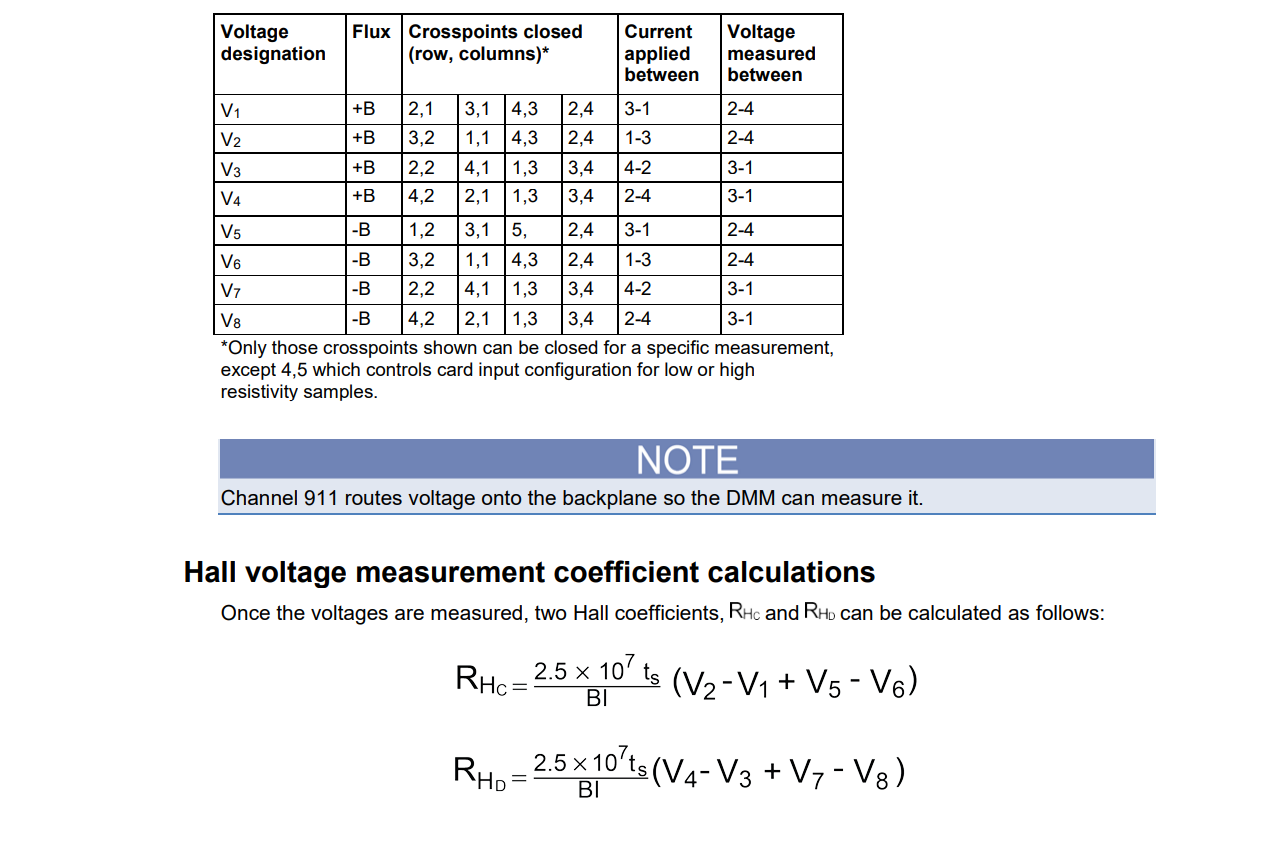

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [74]:
filename='C:\\Users\\Admin\\Desktop\\Data\\9_june_2023\\A304_112K_P1T_N1T.csv'
df = pd.read_csv(filename, names=["I", "B","T", "V1", "V2", "V3", "V4",'Rel_value'])
df['multiplier'] = 10**6
df
# NEED TO ADD MULITPLIER IN THE LABVIEW CODE

,I,B,T,V1,V2,V3,V4,Rel_value,multiplier
0,0.001,0.302878,112.104004,548.233841,-548.108547,-530.388803,530.301799,8.650000e-07,1000000
1,0.001,500.312431,112.003793,547.526226,-547.543918,-530.712151,530.718992,7.666000e-07,1000000
2,0.001,1000.513809,111.999948,546.386416,-546.396280,-531.756339,531.807202,7.590000e-07,1000000
3,0.001,1500.479272,111.999999,543.480477,-543.360785,-534.143170,534.202512,7.273000e-07,1000000
4,0.001,2000.455420,112.000019,537.102254,-536.935498,-538.747343,538.832838,7.326000e-07,1000000
...,...,...,...,...,...,...,...,...,...
78,0.001,6000.349023,112.000824,507.954336,-507.944721,-549.708900,549.733501,6.223000e-07,1000000
79,0.001,7000.332153,112.000280,505.921767,-505.925490,-548.967066,549.015708,6.119000e-07,1000000
80,0.001,8000.430469,112.000444,503.950464,-503.953602,-548.204275,548.261390,6.089000e-07,1000000
81,0.001,9000.544727,111.999331,502.048506,-502.043596,-547.428072,547.467063,6.050000e-07,1000000


In [75]:
df['V1'] = -1*df['V1']
df['V2'] = -1*df['V2']
df['V3'] = -1*df['V3']
df['V4'] = -1*df['V4']

### Converting B to integer B

In [76]:
def round_fun(a):
    step = 500
    if a > 0 : q = int((a+1)/step)
    else : q = int((a-1)/step)
    return q*step

df['B_int'] = list(map(round_fun,df['B'].values))
df = df[['I', 'B', 'B_int', 'T', 'V1', 'V2', 'V3', 'V4', 'Rel_value', 'multiplier']].copy()

In [77]:
df.head()

,I,B,B_int,T,V1,V2,V3,V4,Rel_value,multiplier
0,0.001,0.302878,0,112.104004,-548.233841,548.108547,530.388803,-530.301799,8.650000e-07,1000000
1,0.001,500.312431,500,112.003793,-547.526226,547.543918,530.712151,-530.718992,7.666000e-07,1000000
2,0.001,1000.513809,1000,111.999948,-546.386416,546.396280,531.756339,-531.807202,7.590000e-07,1000000
3,0.001,1500.479272,1500,111.999999,-543.480477,543.360785,534.143170,-534.202512,7.273000e-07,1000000
4,0.001,2000.455420,2000,112.000019,-537.102254,536.935498,538.747343,-538.832838,7.326000e-07,1000000


In [78]:
data_temp = df.copy()
data_temp['R1'] = df['V1']/(df['multiplier']*df['I'])
data_temp['R2'] = df['V2']/(df['multiplier']*df['I'])
data_temp['R3'] = df['V3']/(df['multiplier']*df['I'])
data_temp['R4'] = df['V4']/(df['multiplier']*df['I'])

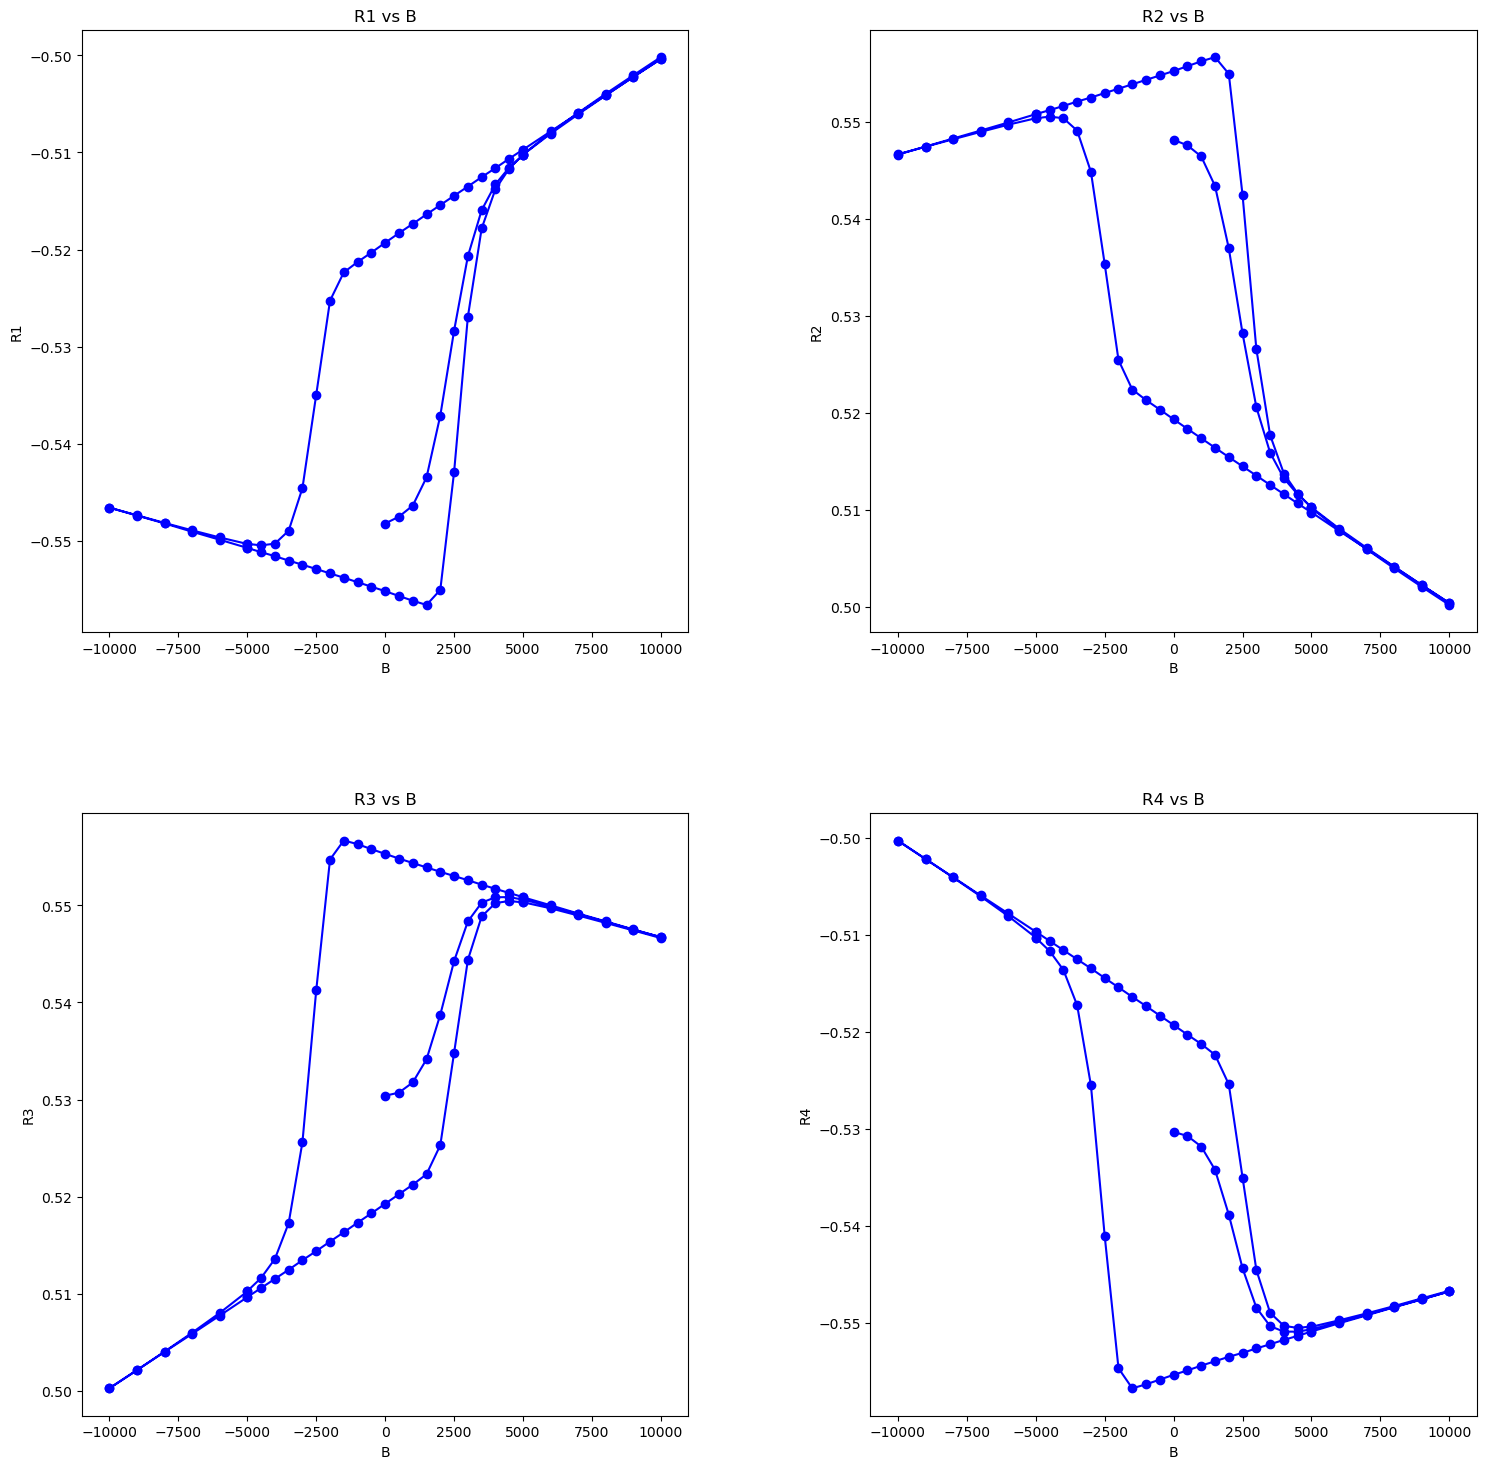

In [79]:
plt.figure(figsize=(18,18))
plt.subplot(2,2,1)
plt.plot(data_temp['B'],data_temp['R1'], 'bo-')
plt.title('R1 vs B')
plt.ylabel('R1')
plt.xlabel('B')
plt.subplot(2,2,2)
plt.plot(data_temp['B'],data_temp['R2'], 'bo-')
plt.title('R2 vs B')
plt.ylabel('R2')
plt.xlabel('B')
plt.subplot(2,2,3)
plt.plot(data_temp['B'],data_temp['R3'], 'bo-')
plt.title('R3 vs B')
plt.ylabel('R3')
plt.xlabel('B')
plt.subplot(2,2,4)
plt.plot(data_temp['B'],data_temp['R4'], 'bo-')
plt.title('R4 vs B')
plt.ylabel('R4')
plt.xlabel('B')
plt.subplots_adjust(hspace = 0.3, wspace = 0.3)
plt.show()

### Truncating intial data (0 to 1 T)

In [80]:
B_max = max(df['B_int'])
B_max_first_idx = 0
for i in range(len(df)):
    if df.iloc[i].B_int == B_max:
        B_max_first_idx = i
        break
B_max_first_idx

16

In [81]:
df = df.iloc[B_max_first_idx+1:].copy()
df.reset_index(inplace = True, drop = True) # resetting index

## Spliting data into two subset (increasing and decreasing of magnetic field)

B_max to B_min --> Decreasing

B_min to B_max --> increasing


In [82]:
B_max = max(df['B_int'])
B_min = min(df['B_int'])
print(B_max, B_min)

10000 -10000


In [83]:
# finding index of first appearance of B_min
B_min_first_idx = 0
for i in range(len(df)):
    if df.iloc[i].B_int == B_min:
        B_min_first_idx = i
        break
B_min_first_idx

32

In [84]:
# now split it into two data set
df_dec = df.iloc[0:B_min_first_idx+1].copy()
df_inc = df.iloc[B_min_first_idx+1:].copy()

In [85]:
df_dec.head()

,I,B,B_int,T,V1,V2,V3,V4,Rel_value,multiplier
0,0.001,10000.274023,10000,112.000672,-500.365121,500.361867,546.730419,-546.740104,6.493000e-07,1000000
1,0.001,9000.481396,9000,112.000259,-502.216246,502.219556,547.531926,-547.577682,6.711000e-07,1000000
2,0.001,8000.321729,8000,112.000216,-504.095744,504.099983,548.356682,-548.383167,6.727000e-07,1000000
3,0.001,7000.611328,7000,112.000593,-505.957931,505.957037,549.168453,-549.218545,6.623000e-07,1000000
4,0.001,6000.443481,6000,111.999955,-507.832992,507.814590,550.020904,-550.035475,6.743000e-07,1000000


In [86]:
df_inc.head()

,I,B,B_int,T,V1,V2,V3,V4,Rel_value,multiplier
33,0.001,-10000.308398,-10000,112.000058,-546.594480,546.594541,500.231868,-500.245530,6.161000e-07,1000000
34,0.001,-9000.563672,-9000,112.000434,-547.410486,547.418221,502.118371,-502.150914,6.021000e-07,1000000
35,0.001,-8000.409302,-8000,112.000212,-548.222693,548.242619,503.991391,-504.029513,6.070000e-07,1000000
36,0.001,-7000.332056,-7000,112.000242,-549.076643,549.067655,505.849850,-505.913629,5.968000e-07,1000000
37,0.001,-6000.346484,-6000,112.000468,-549.902360,549.898173,507.730413,-507.773033,6.092000e-07,1000000


In [87]:
df_dec.drop_duplicates(subset='B_int', keep='first', inplace=True) # remove duplicates
df_inc.drop_duplicates(subset='B_int', keep='first', inplace=True) # remove duplicates

## Creating decreasing Field data

In [88]:
data = pd.merge(df_dec.assign(key=1), df_inc.assign(key=1), on='key').drop('key', axis=1) # cross product

data = data[data['B_int_x'] == -1*data['B_int_y']] # selecting 
data = data[['I_x','B_int_x','T_x','V1_x','V2_x','V3_x','V4_x','V1_y','V2_y','V3_y','V4_y','multiplier_x']].copy() # req coloumns

data.rename({'I_x' : 'I', 'B_int_x' : 'B', 'T_x' : 'T', 'V1_x' : 'V1', 'V2_x' : 'V2', 'V3_x' : 'V3', 'V4_x' : 'V4', 'V1_y' : 'V5', 'V2_y' : 'V6', 'V3_y' : 'V7', 'V4_y' : 'V8', 'multiplier_x' : 'multiplier'}, axis=1, inplace=True)
data.reset_index(inplace = True, drop = True) # resetting index
data.head()

,I,B,T,V1,V2,V3,V4,V5,V6,V7,V8,multiplier
0,0.001,10000,112.000672,-500.365121,500.361867,546.730419,-546.740104,-546.594480,546.594541,500.231868,-500.245530,1000000
1,0.001,9000,112.000259,-502.216246,502.219556,547.531926,-547.577682,-547.410486,547.418221,502.118371,-502.150914,1000000
2,0.001,8000,112.000216,-504.095744,504.099983,548.356682,-548.383167,-548.222693,548.242619,503.991391,-504.029513,1000000
3,0.001,7000,112.000593,-505.957931,505.957037,549.168453,-549.218545,-549.076643,549.067655,505.849850,-505.913629,1000000
4,0.001,6000,111.999955,-507.832992,507.814590,550.020904,-550.035475,-549.902360,549.898173,507.730413,-507.773033,1000000


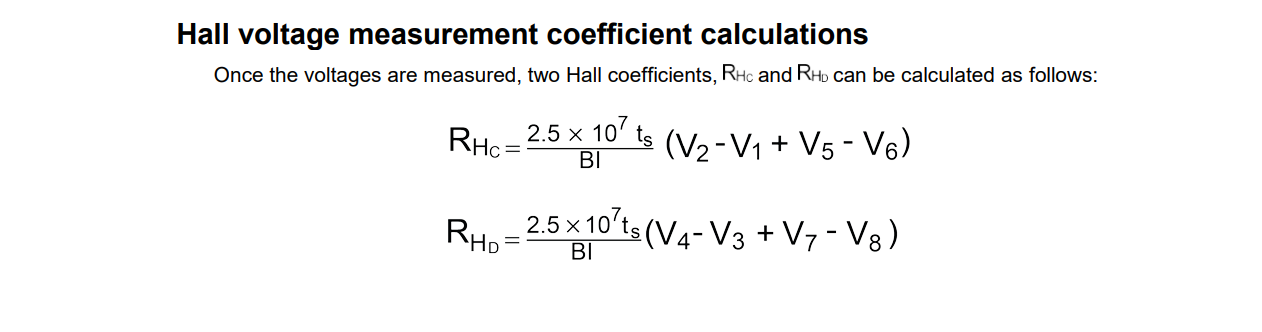
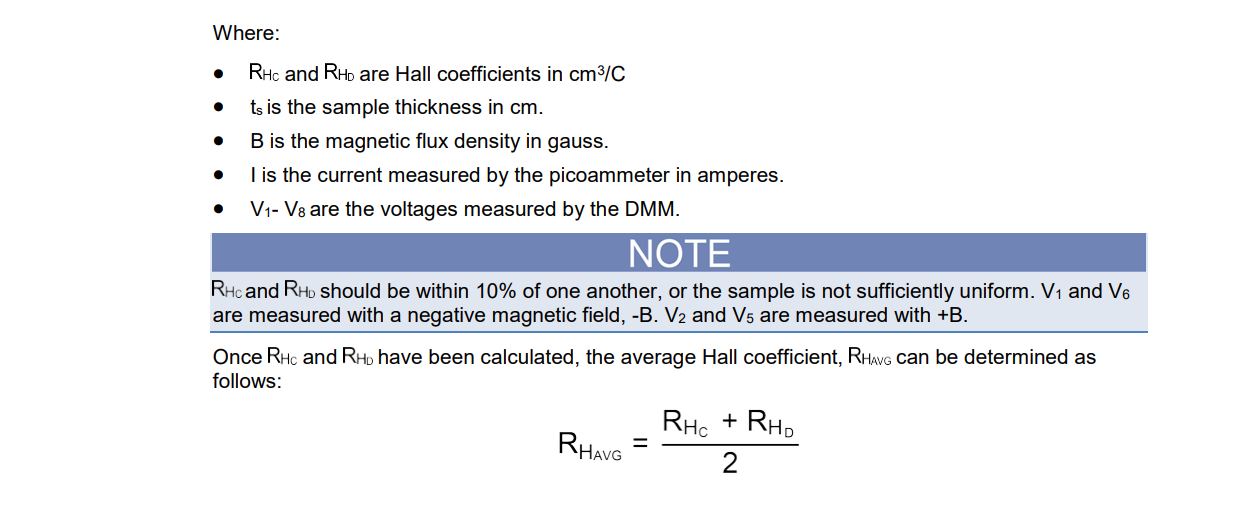

## Note : Here RHc & RHd we computed is Hall resistance, not Hall coefficients.

In [89]:
data['RHc'] = (data['V2'] - data['V1'] + data['V5'] - data['V6'])/(data['I']*data['multiplier'])
data['RHd'] = (data['V4'] - data['V3'] + data['V7'] - data['V8'])/(data['I']*data['multiplier'])
data['R'] = (data['RHc'] + data['RHd'])/2

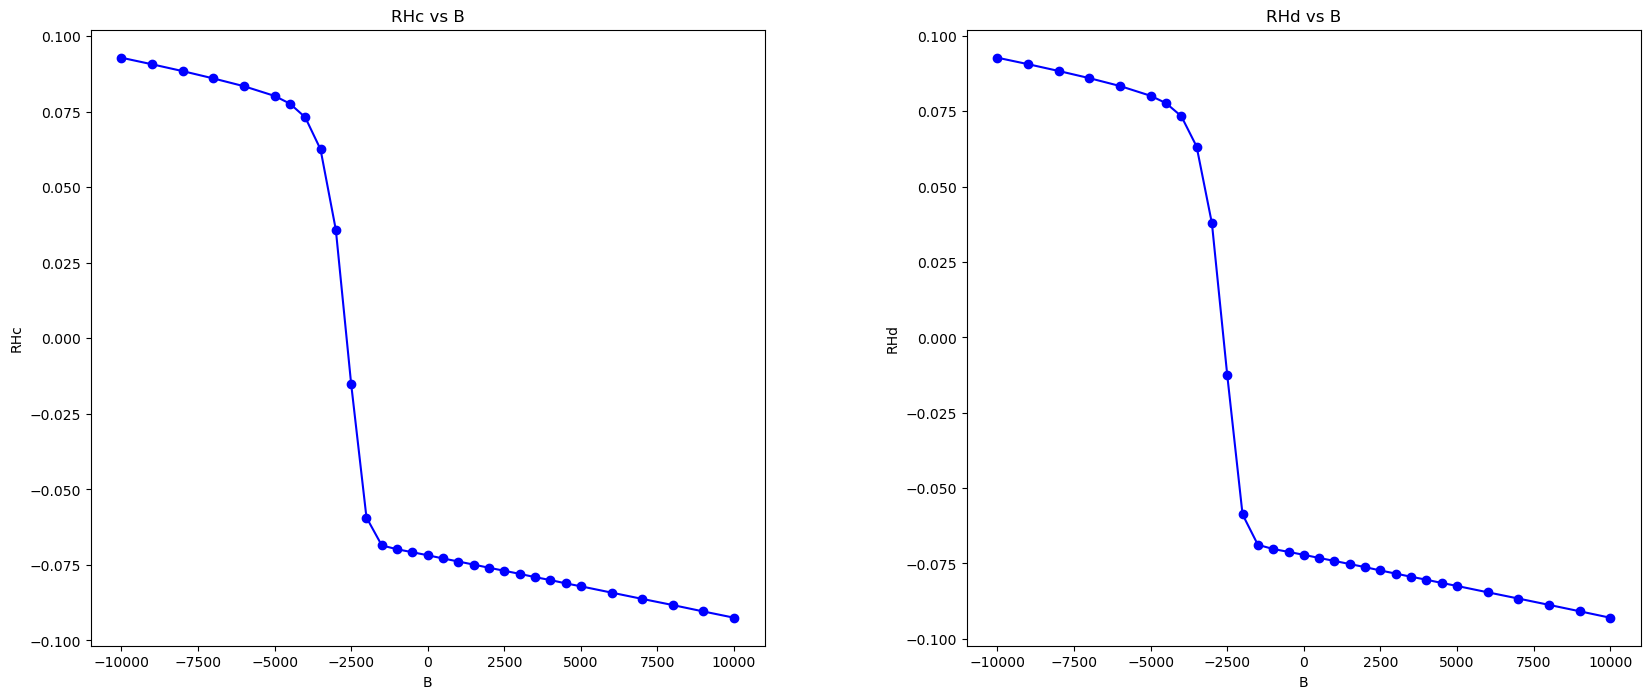

In [90]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.plot(data['B'],data['RHc'],'bo-')
plt.title('RHc vs B')
plt.ylabel('RHc')
plt.xlabel('B')
plt.subplot(1,2,2)
plt.plot(data['B'],data['RHd'],'bo-')
plt.title('RHd vs B')
plt.ylabel('RHd')
plt.xlabel('B')
plt.subplots_adjust(hspace = 0, wspace = 0.3)
plt.show()

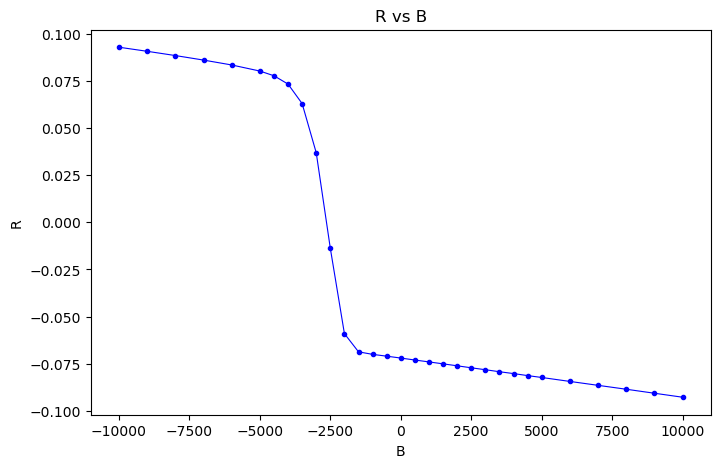

In [91]:
plt.figure(figsize=(8,5))
plt.plot(data['B'],data['R'],'bo-', linewidth=0.8, markersize=3)
plt.title('R vs B')
plt.ylabel('R')
plt.xlabel('B')
plt.show()

## Creating Increasing Field data

In [92]:
data2 = pd.merge(df_inc.assign(key=1), df_dec.assign(key=1), on='key').drop('key', axis=1) # cross product

data2 = data2[data2['B_int_x'] == -1*data2['B_int_y']] # selecting 
data2 = data2[['I_x','B_int_x','T_x','V1_x','V2_x','V3_x','V4_x','V1_y','V2_y','V3_y','V4_y','multiplier_x']].copy() # req coloumns

data2.rename({'I_x' : 'I', 'B_int_x' : 'B', 'T_x' : 'T', 'V1_x' : 'V1', 'V2_x' : 'V2', 'V3_x' : 'V3', 'V4_x' : 'V4', 'V1_y' : 'V5', 'V2_y' : 'V6', 'V3_y' : 'V7', 'V4_y' : 'V8', 'multiplier_x' : 'multiplier'}, axis=1, inplace=True)
data2.reset_index(inplace = True, drop = True) # resetting index
data2.head()

,I,B,T,V1,V2,V3,V4,V5,V6,V7,V8,multiplier
0,0.001,-10000,112.000058,-546.594480,546.594541,500.231868,-500.245530,-500.365121,500.361867,546.730419,-546.740104,1000000
1,0.001,-9000,112.000434,-547.410486,547.418221,502.118371,-502.150914,-502.216246,502.219556,547.531926,-547.577682,1000000
2,0.001,-8000,112.000212,-548.222693,548.242619,503.991391,-504.029513,-504.095744,504.099983,548.356682,-548.383167,1000000
3,0.001,-7000,112.000242,-549.076643,549.067655,505.849850,-505.913629,-505.957931,505.957037,549.168453,-549.218545,1000000
4,0.001,-6000,112.000468,-549.902360,549.898173,507.730413,-507.773033,-507.832992,507.814590,550.020904,-550.035475,1000000


### Hall resistance calculation

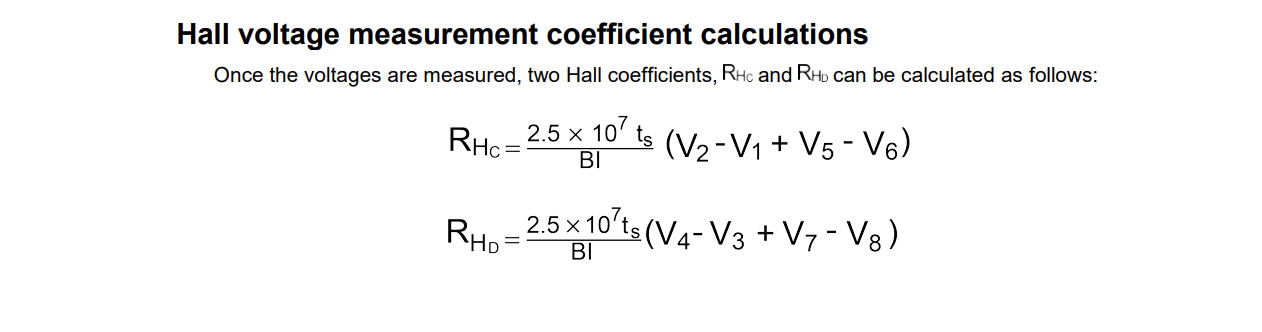

## Note : Here RHc & RHd we computed is Hall resistance, not Hall coefficients.

In [93]:
data2['RHc'] = (data2['V2'] - data2['V1'] + data2['V5'] - data2['V6'])/(data2['I']*data2['multiplier'])
data2['RHd'] = (data2['V4'] - data2['V3'] + data2['V7'] - data2['V8'])/(data2['I']*data2['multiplier'])

data2['R'] = (data2['RHc'] + data2['RHd'])/2

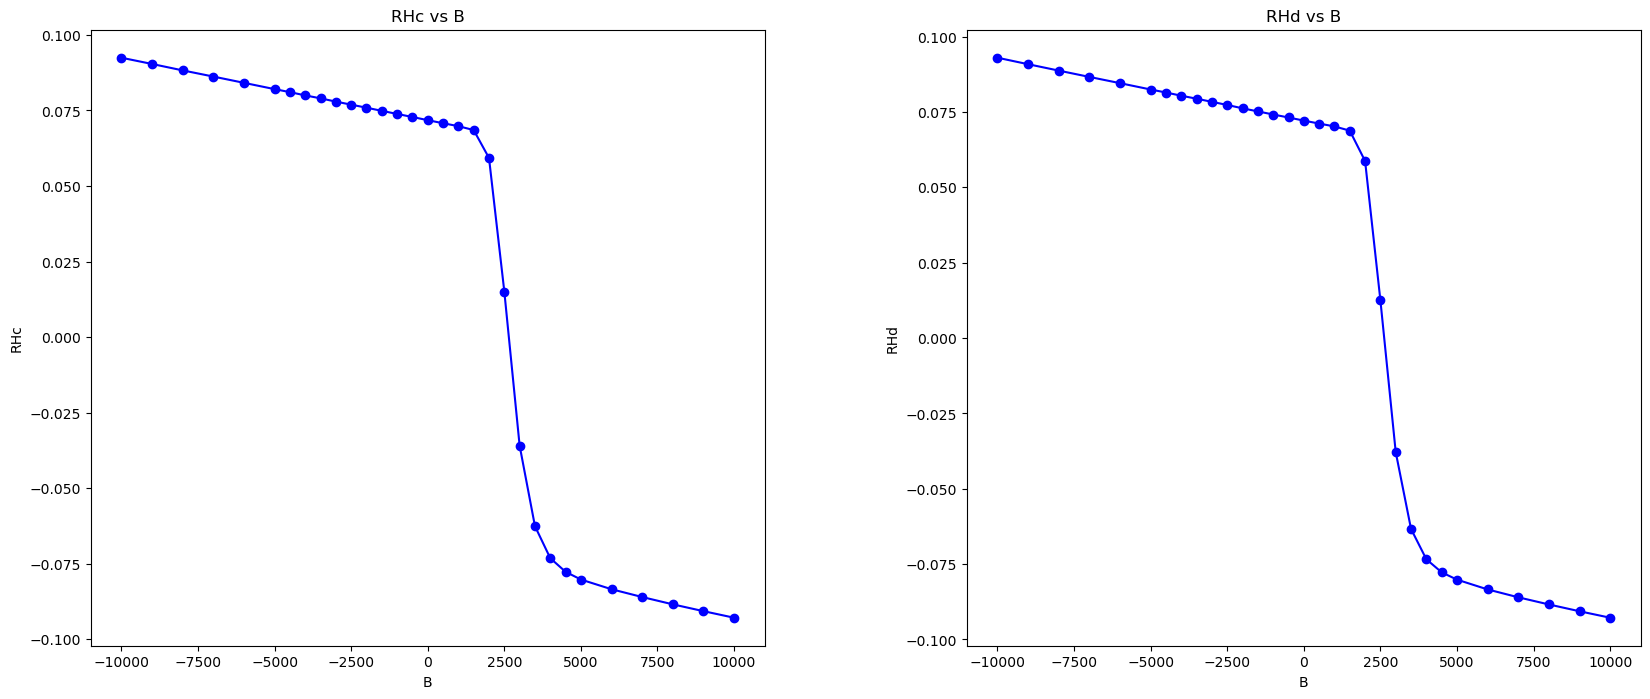

In [94]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.plot(data2['B'],data2['RHc'],'bo-')
plt.title('RHc vs B')
plt.ylabel('RHc')
plt.xlabel('B')
plt.subplot(1,2,2)
plt.plot(data2['B'],data2['RHd'],'bo-')
plt.title('RHd vs B')
plt.ylabel('RHd')
plt.xlabel('B')
plt.subplots_adjust(hspace = 0, wspace = 0.3)
plt.show()

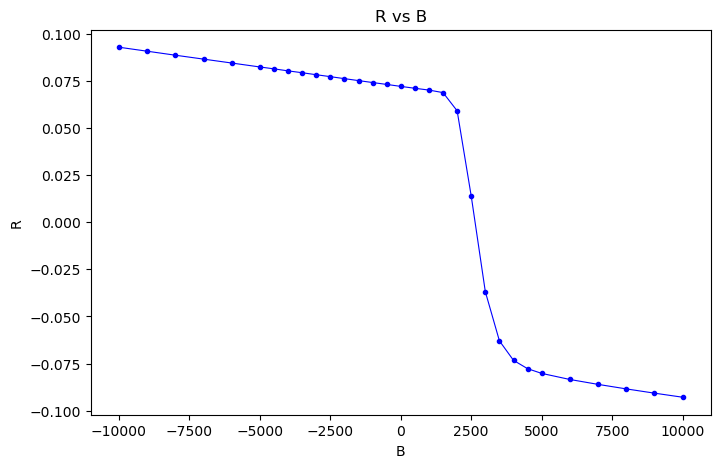

In [95]:
plt.figure(figsize=(8,5))
plt.plot(data2['B'],data2['R'],'bo-', linewidth=0.8, markersize=3)
plt.title('R vs B')
plt.ylabel('R')
plt.xlabel('B')
plt.show()

## Plotting on same graph

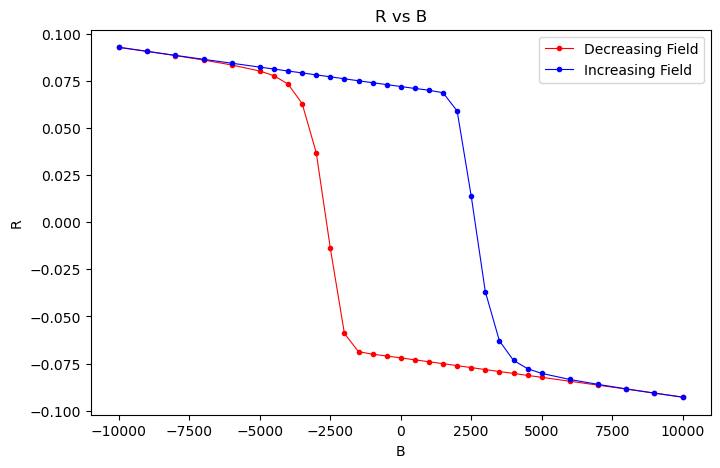

In [96]:
plt.figure(figsize=(8,5))
plt.plot(data['B'], data['R'], 'ro-', linewidth=0.8, markersize=3, label = 'Decreasing Field')
plt.plot(data2['B'],data2['R'],'bo-', linewidth=0.8, markersize=3, label = 'Increasing Field')
plt.title('R vs B')
plt.ylabel('R')
plt.xlabel('B')
plt.legend()
plt.show()